Машинное обучение.
Лабораторная работа 1.

Исполнитель: Ошмарин Никита ФЗ-11-2020 НБ 3 курс

Набор данных:
Russia Real Estate 2018-2021
https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021.

Он представляет собой набор данных квартир в России, содержащий следующие поля: дата и время публикации, географическое расположение (координаты на карте), регион России, тип фасада дома (панельный, монолитный, кирпичный, блочный, деревянный и др.), вид квартиры (вторичный рынок или рынок новостроек), этаж квартиры, кол-во этажей в доме, кол-во комнат, площадь квартиры, площадь кухни, цена в рублях.

Набор данных может быть использован для анализа взаимосвязей между признаками (полями) и построения прогнозов цены.

Цель: изучить/вспомнить методы/инструменты работы с данными, визуализации данных, конструирования признаков.

Задачи:
1. Визуализировать данные с учётом требований оформления графиков в виде информационной/аналитической панели из минимум 3х элементов. Единицы измерения, подписи, одна палитра, один стиль оформления. Например, 2 графика различного типа и таблица характеристик/примеров/показателей.
2. Обогатить данные по недвижимости через координаты данными, например, о расстоянии до какого-нибудь вида ближайщих объектов: центр города, метро, социальный объект, транспорт и т.д.

1. Загрузка данных.

In [1]:
# # устанавливаем kaggle для прямой загрузки набора данных с сервера с помощью токена доступа
# ! pip install -q kaggle

In [2]:
# from google.colab import files

# # загружаем токен доступа (его можно сгенерировать и скачать в личном кабинете kaggle)
# file_token = files.upload()

In [3]:
# # создаем папку для хранения токена
# ! mkdir ~/.kaggle

# # копируем туда токен
# ! cp kaggle.json ~/.kaggle/

# # меняем права доступа для владельца (только чтение и запись)
# ! chmod 600 ~/.kaggle/kaggle.json

# # скачиваем набор данных с сервера kaggle
# ! kaggle datasets download -d 'mrdaniilak/russia-real-estate-20182021'

# # задаем путь архива
# zip_name = 'mrdaniilak/russia-real-estate-20182021'

# # разархивируем
# !unzip -q ./{zip_name.split('/')[-1]}.zip -d .

In [4]:
import pandas as pd
import numpy as np

# загружаем набор данных в pandas Dataframe
df_source = pd.read_csv("all_v2.csv")
df_source.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


2. Фильтрация нужных данных. Например, только один город (Москва). Только не очень большое количество данных. Только нужные колонки.

In [5]:
# удаляем время публикации и регион т.к. они нам не важны
df = df_source.drop(columns=['time', 'region'])

# коордианаты центра г. Екатеринбург
coord_center_x = 56.831207
coord_center_y = 60.607047

# вычисляем расстояние от края города до центра (приблизительно)
difference = abs(coord_center_y - 60.493168)

# фильтруем квартиры по точкам, входящим в круг (область г. Екатеринбург)
df = df[((coord_center_x - df['geo_lat']) ** 2 + (coord_center_y - df['geo_lon']) ** 2) < difference ** 2]
df.head()

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type
208,3490000,2018-08-31,56.897724,60.573341,3,5,5,3,60.8,6.0,1
312,3400000,2018-09-08,56.856373,60.561162,1,4,9,2,43.0,8.0,1
1459,2990000,2018-09-08,56.908556,60.616950,3,8,16,1,37.0,10.0,1
1479,4210800,2018-09-08,56.895915,60.614371,2,13,25,3,69.6,12.6,11
1490,2790000,2018-09-08,56.857466,60.635108,1,2,9,2,43.0,7.0,1


In [6]:
# смотрим информацию о пропусках в колонках и типах данных
# дата (date) имеет тип object (позже разобьем ее на день, месяц, год и добавим время года)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152438 entries, 208 to 5476967
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          152438 non-null  int64  
 1   date           152438 non-null  object 
 2   geo_lat        152438 non-null  float64
 3   geo_lon        152438 non-null  float64
 4   building_type  152438 non-null  int64  
 5   level          152438 non-null  int64  
 6   levels         152438 non-null  int64  
 7   rooms          152438 non-null  int64  
 8   area           152438 non-null  float64
 9   kitchen_area   152438 non-null  float64
 10  object_type    152438 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 14.0+ MB


3. Очистка выбросов.

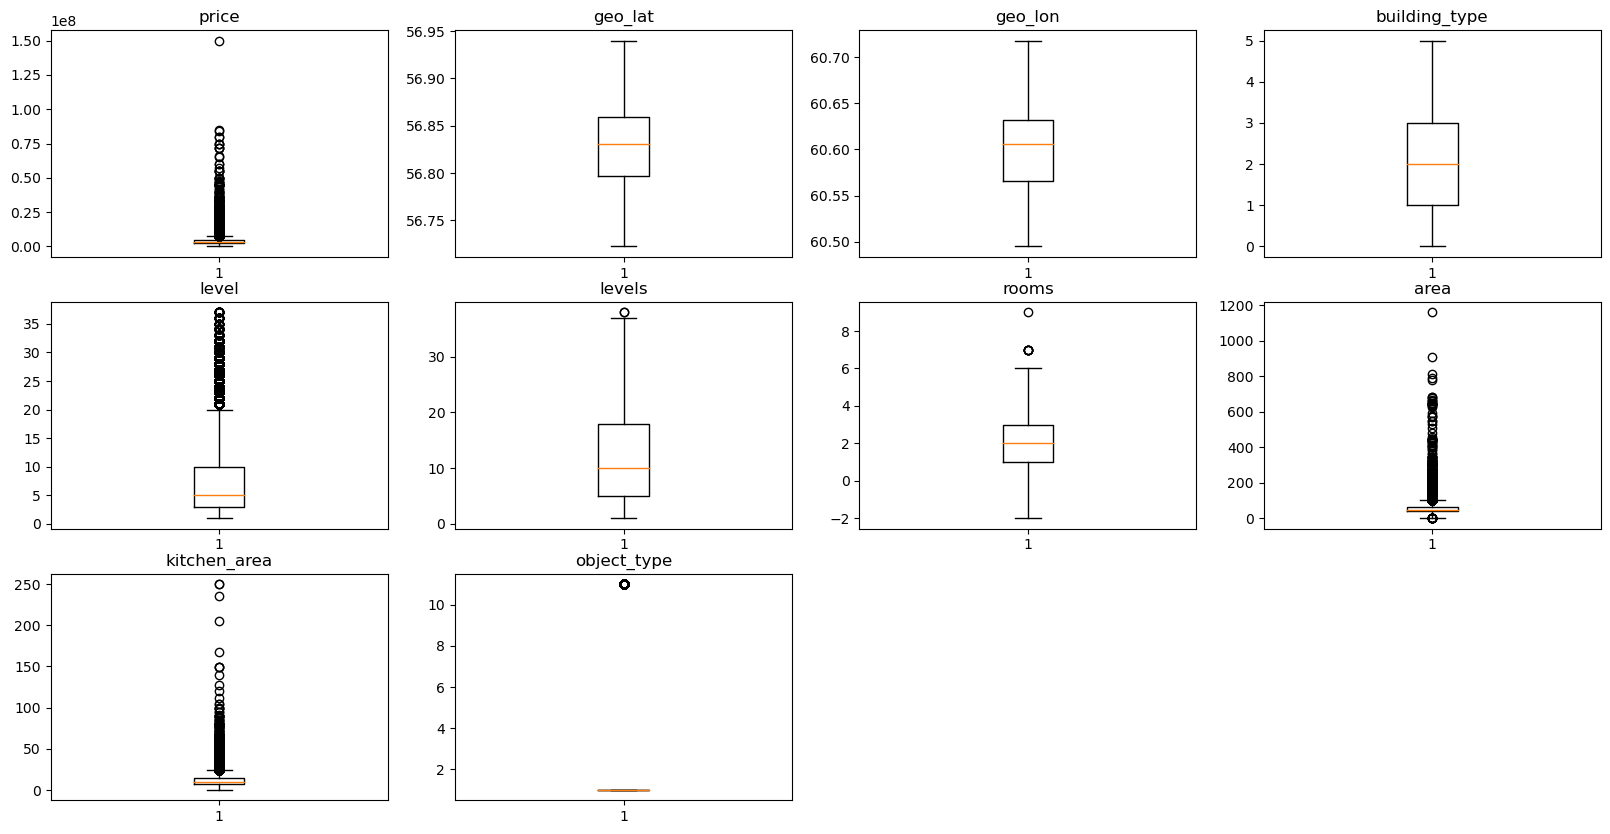

In [7]:
import matplotlib.pyplot as plt

# строим диаграммы размаха, чтобы понять есть ли выбросы (выбросы выходят за пределы 25% и 75% квантилей)
def get_boxplots_for_df_col(source_df, columns):
  plt.figure(figsize=[20, 10])
  for col in columns:
    plt.subplot(3, 4, int(columns.index(col)+1))
    plt.gca().set_title(col)
    plt.boxplot(source_df[col])

columns = list(df.columns)
columns.remove('date')
get_boxplots_for_df_col(df, columns)

# выбросы есть в колонках price, area, kitchen_area

In [8]:
def filter_IQR(df, column_name):
    q_low = df[column_name].quantile(0.25)
    q_hi  = df[column_name].quantile(0.75)
    df.drop(df[(df[column_name] < q_low) | (df[column_name] > q_hi)].index, inplace=True)

# отфильтруем набор данных по столбцу price в пределах 25% и 75% квантилей
filter_IQR(df, 'price')

In [9]:
df.info()

# из 152438 записей осталось лишь 76363 записи

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76363 entries, 208 to 5476967
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          76363 non-null  int64  
 1   date           76363 non-null  object 
 2   geo_lat        76363 non-null  float64
 3   geo_lon        76363 non-null  float64
 4   building_type  76363 non-null  int64  
 5   level          76363 non-null  int64  
 6   levels         76363 non-null  int64  
 7   rooms          76363 non-null  int64  
 8   area           76363 non-null  float64
 9   kitchen_area   76363 non-null  float64
 10  object_type    76363 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 7.0+ MB


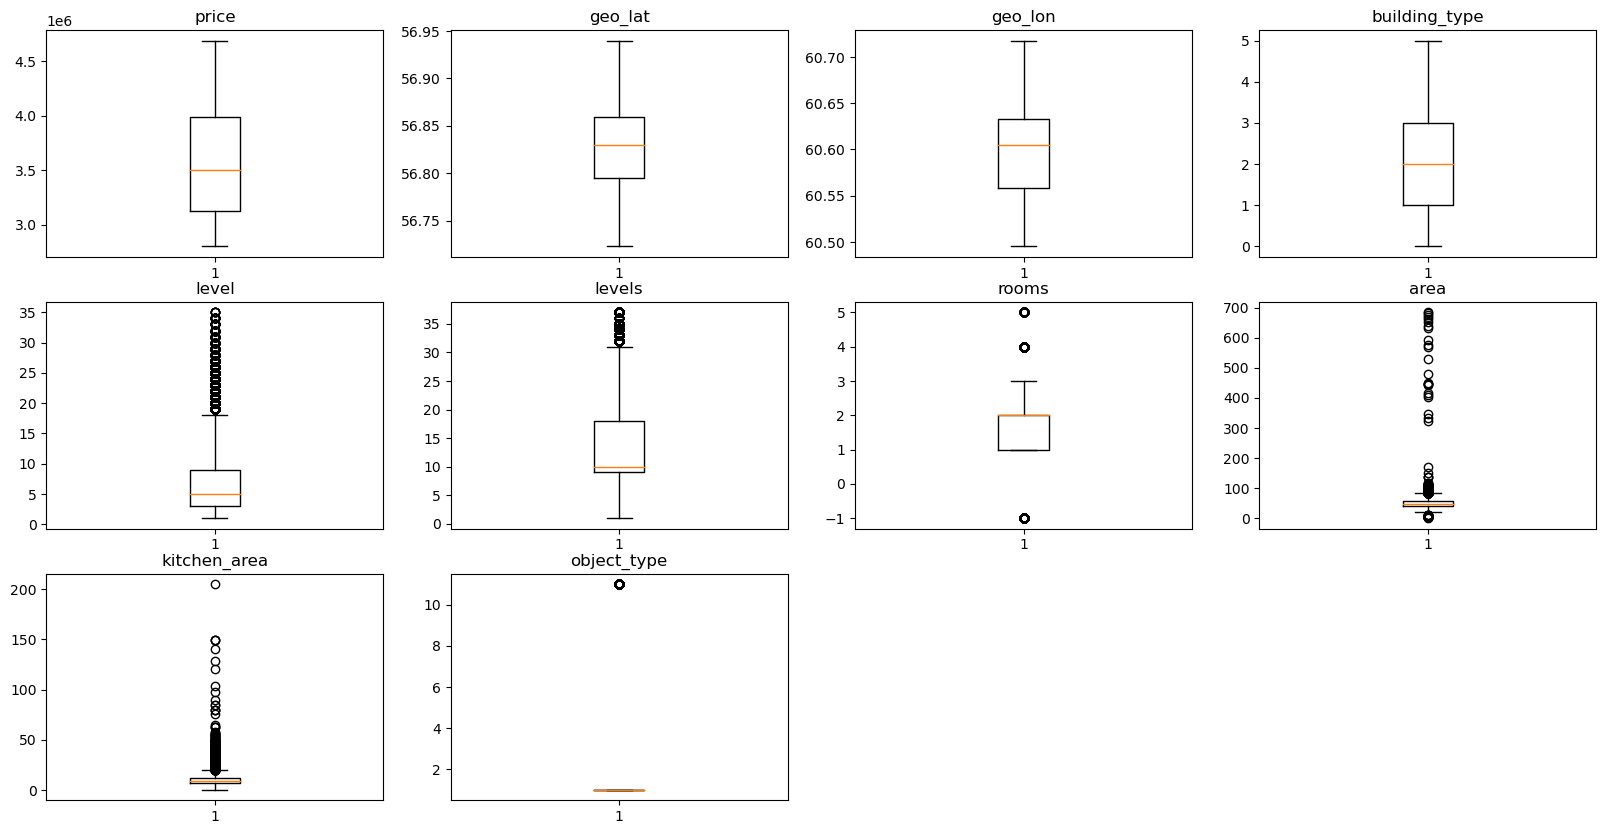

In [10]:
# смотрим еще раз диаграммы размаха
columns = list(df.columns)
columns.remove('date')
get_boxplots_for_df_col(df, columns)

# нас не интересуют слишком большие или слишком маленькие по площади квартиры

In [11]:
# фильтруем по площади (area) в пределах 18 <= area <= 80
# т.е. убираем те квартиры, которые выходят за пределы

column_name = 'area'
df.drop(df[(df[column_name] < 18) | (df[column_name] > 80)].index, inplace=True)

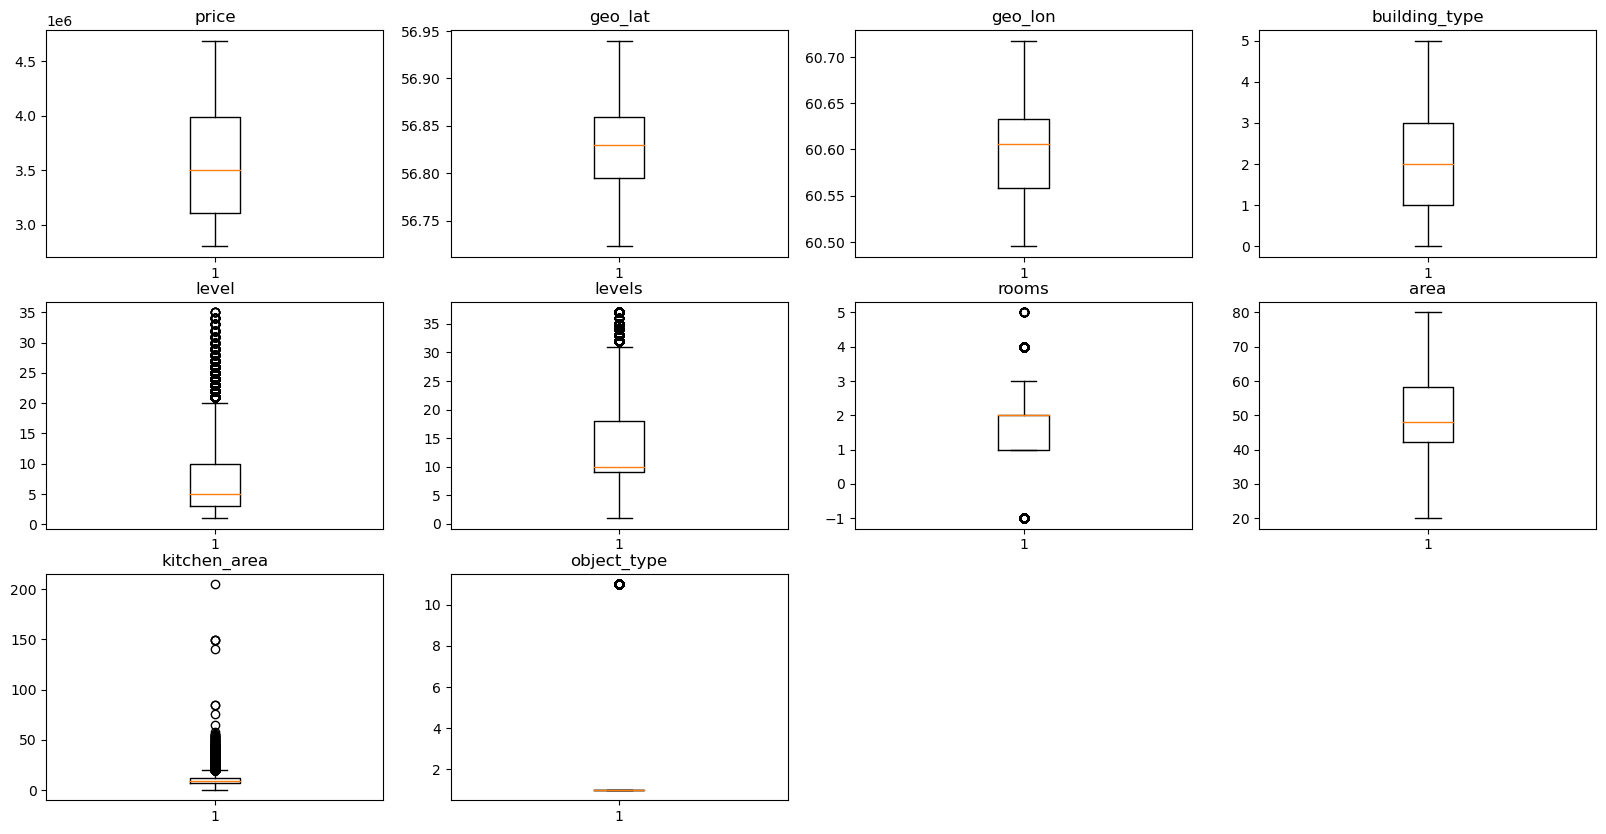

In [12]:
# смотрим еще раз диаграммы размаха
columns = list(df.columns)
columns.remove('date')
get_boxplots_for_df_col(df, columns)

In [13]:
# фильтруем по площади кухни (kitchen_area) в пределах kitchen_area <= 20
# т.е. убираем те квартиры, которые выходят за пределы

column_name = 'kitchen_area'
df.drop(df[(df[column_name] > 20)].index, inplace=True)

In [14]:
df.info()

# смотрим в итоге осталось 72516 записей

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72516 entries, 208 to 5476967
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          72516 non-null  int64  
 1   date           72516 non-null  object 
 2   geo_lat        72516 non-null  float64
 3   geo_lon        72516 non-null  float64
 4   building_type  72516 non-null  int64  
 5   level          72516 non-null  int64  
 6   levels         72516 non-null  int64  
 7   rooms          72516 non-null  int64  
 8   area           72516 non-null  float64
 9   kitchen_area   72516 non-null  float64
 10  object_type    72516 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 6.6+ MB


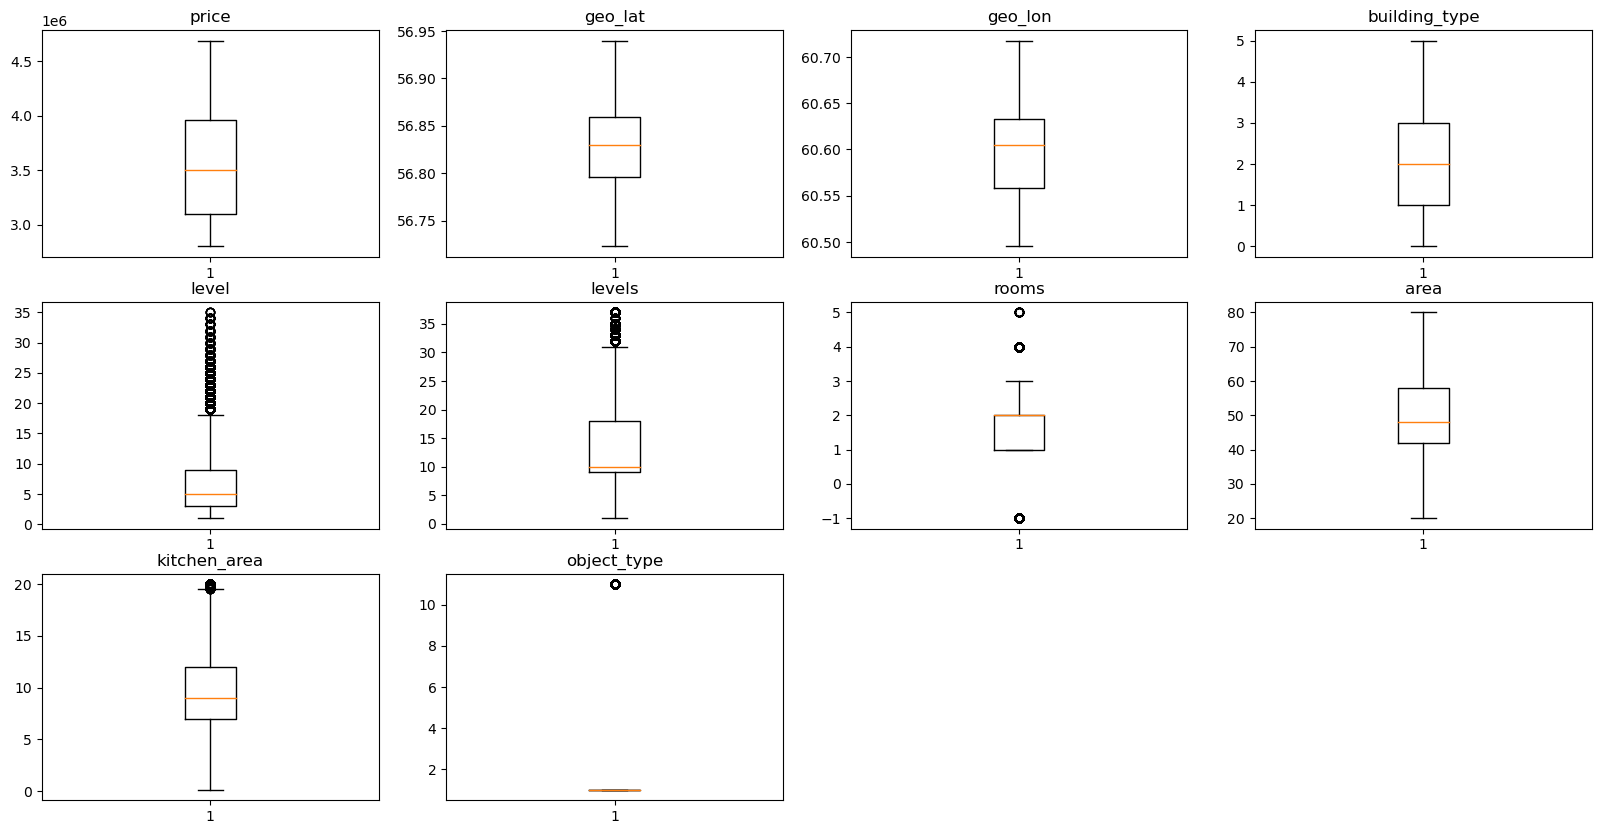

In [15]:
# смотрим еще раз диаграммы размаха
columns = list(df.columns)
columns.remove('date')
get_boxplots_for_df_col(df, columns)

# теперь с этими данными можно работать

In [16]:
# в наборе данных есть квартиры с object_type равным 11
# в описании сказано что есть два типа: 1 - вторичное жилье и 2 - новостройки
# скорее всего под 11 имелось ввиду 2 т.к. 2 в наборе нет совсем

df['object_type'].replace(11, 2, inplace=True)

4. Генерация признаков.
Загрузка дополнительных данных, обогащающих данные недвижимость, например, координаты станций метро.

In [17]:
# преобразуем колонку date в тип datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [18]:
# добавим сезон (весна, лето, осень, зима)
# весна - апрель, май
# лето - июнь, июль, август
# осень - сентябрь, октябрь
# зима - ноябрь, декабрь, январь, февраль, март
dict_values = {
    1: 'зима',
    2: 'зима',
    3: 'зима',
    4: 'весна',
    5: 'весна',
    6: 'лето',
    7: 'лето',
    8: 'лето',
    9: 'осень',
    10: 'осень',
    11: 'зима',
    12: 'зима',
}

df['season'] = pd.DatetimeIndex(df['date']).month
df['season'].replace(dict_values, inplace=True)
df.head()

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,season
208,3490000,2018-08-31,56.897724,60.573341,3,5,5,3,60.8,6.0,1,лето
312,3400000,2018-09-08,56.856373,60.561162,1,4,9,2,43.0,8.0,1,осень
1459,2990000,2018-09-08,56.908556,60.616950,3,8,16,1,37.0,10.0,1,осень
1479,4210800,2018-09-08,56.895915,60.614371,2,13,25,3,69.6,12.6,2,осень
1499,3500000,2018-09-08,56.865845,60.640797,2,2,25,1,46.0,12.0,1,осень


In [19]:
# добавим информацию о расстоянии до ближайшей станции метро в г. Екатеринбург в метрах

import math as Math

# всего 9 станций метро (одна ветка)
coords_metro = [
    (56.79714300,60.63240100,"Ботаническая"),
    (56.84740900,60.59906700,"Динамо"),
    (56.88850500,60.61381700,"Уралмаш"),
    (56.82712800,60.60223400,"Геологическая"),
    (56.90446500,60.61381700,"Проспект Космонавтов"),
    (56.85763700,60.59990000,"Уральская"),
    (56.80775100,60.61056700,"Чкаловская"),
    (56.87838500,60.61184300,"Машиностроителей"),
    (56.83631600,60.59979800,"Площадь 1905 года")
]

# функция рассчета расстояния в метрах от точки до точки по координатам
def measure(lat1, lon1, lat2, lon2):
    R = 6378.137
    dLat = lat2 * Math.pi / 180 - lat1 * Math.pi / 180
    dLon = lon2 * Math.pi / 180 - lon1 * Math.pi / 180
    a = Math.sin(dLat/2) * Math.sin(dLat/2) + \
    Math.cos(lat1 * Math.pi / 180) * Math.cos(lat2 * Math.pi / 180) * \
    Math.sin(dLon/2) * Math.sin(dLon/2)
    c = 2 * Math.atan2(Math.sqrt(a), Math.sqrt(1-a))
    d = R * c
    return d * 1000

# функция поиска минимального расстояния до метро (в метрах)
def metro(s):
    min_distance = 1000000
    near = None
    for coord in coords_metro:
      cur_distance = measure(coord[0], coord[1], s['geo_lat'], s['geo_lon'])
      if (cur_distance < min_distance):
        min_distance = cur_distance
        near = coord[2]
    return (near, round(min_distance))

# применяем функцию к набору данных в разрезе записей
df["metro_distance"] = df.apply(metro, axis=1)
df[["metro_station", "metro_distance"]] = pd.DataFrame(df["metro_distance"].tolist(), index=df.index)

In [20]:
# добавим информацию о расстоянии до ближайшего (крупного) ТЦ в г. Екатеринбург в метрах

# всего 31 ТЦ (крупный)
coords_markets = [
    (56.779216, 60.547827,"Краснолесье"),
    (56.788920, 60.482589,"Юла"),
    (56.816708, 60.537412,"Радуга Парк"),
    (56.797367, 60.581953,"Гранат"),
    (56.796430, 60.612884,"Ботаника Молл"),
    (56.808325, 60.611981,"Мегаполис"),
    (56.788315, 60.648141,"Глобус"),
    (56.797274, 60.627596,"Дирижабль"),
    (56.823863, 60.649449,"Гагарин"),
    (56.829963, 60.673488,"Комсомол"),
    (56.843902, 60.696534,"Кор"),
    (56.824190, 60.703488,"Гулливер"),
    (56.852641, 60.641331,"Апельсин"),
    (56.856559, 60.653053,"Современник"),
    (56.862980, 60.631795,"Парк Хаус"),
    (56.861936, 60.644069,"Парус"),
    (56.856347, 60.599102,"Свердловск"),
    (56.853215, 60.551998,"Карнавал"),
    (56.861716, 60.544239,"Пекин"),
    (56.889124, 60.613579,"Стрелка"),
    (56.900240, 60.613123,"Омега"),
    (56.916096, 60.610613,"Veer Mall"),
    (56.904361, 60.597833,"Калинка"),
    (56.823803, 60.505740,"Мега"),
    (56.816409, 60.587434,"Фан фан"),
    (56.816910, 60.562217,"GoodMart"),
    (56.829486, 60.599986,"Гринвич"),
    (56.836607, 60.595604,"Пассаж"),
    (56.832385, 60.582491,"Алатырь"),
    (56.840678, 60.610001,"Sila Voli"),
    (56.794499, 60.519367,"Академический")
]

# функция поиска минимального расстояния до ТЦ (в метрах)
def market(s):
    min_distance = 1000000
    near = None
    for coord in coords_markets:
      cur_distance = measure(coord[0], coord[1], s['geo_lat'], s['geo_lon'])
      if (cur_distance < min_distance):
        min_distance = cur_distance
        near = coord[2]
    return (near, round(min_distance))

# применяем функцию к набору данных в разрезе записей
df["market_distance"] = df.apply(market, axis=1)
df[["market", "market_distance"]] = pd.DataFrame(df["market_distance"].tolist(), index=df.index)

In [21]:
df.head()

,price,date,geo_lat,geo_lon,building_type,level,levels,rooms,area,kitchen_area,object_type,season,metro_distance,metro_station,market_distance,market
208,3490000,2018-08-31,56.897724,60.573341,3,5,5,3,60.8,6.0,1,лето,2572,Проспект Космонавтов,1662,Калинка
312,3400000,2018-09-08,56.856373,60.561162,1,4,9,2,43.0,8.0,1,осень,2362,Уральская,659,Карнавал
1459,2990000,2018-09-08,56.908556,60.616950,3,8,16,1,37.0,10.0,1,осень,494,Проспект Космонавтов,923,Veer Mall
1479,4210800,2018-09-08,56.895915,60.614371,2,13,25,3,69.6,12.6,2,осень,826,Уралмаш,487,Омега
1499,3500000,2018-09-08,56.865845,60.640797,2,2,25,1,46.0,12.0,1,осень,2248,Машиностроителей,479,Парус


5. Визуализация данных. Аналитическая панель.

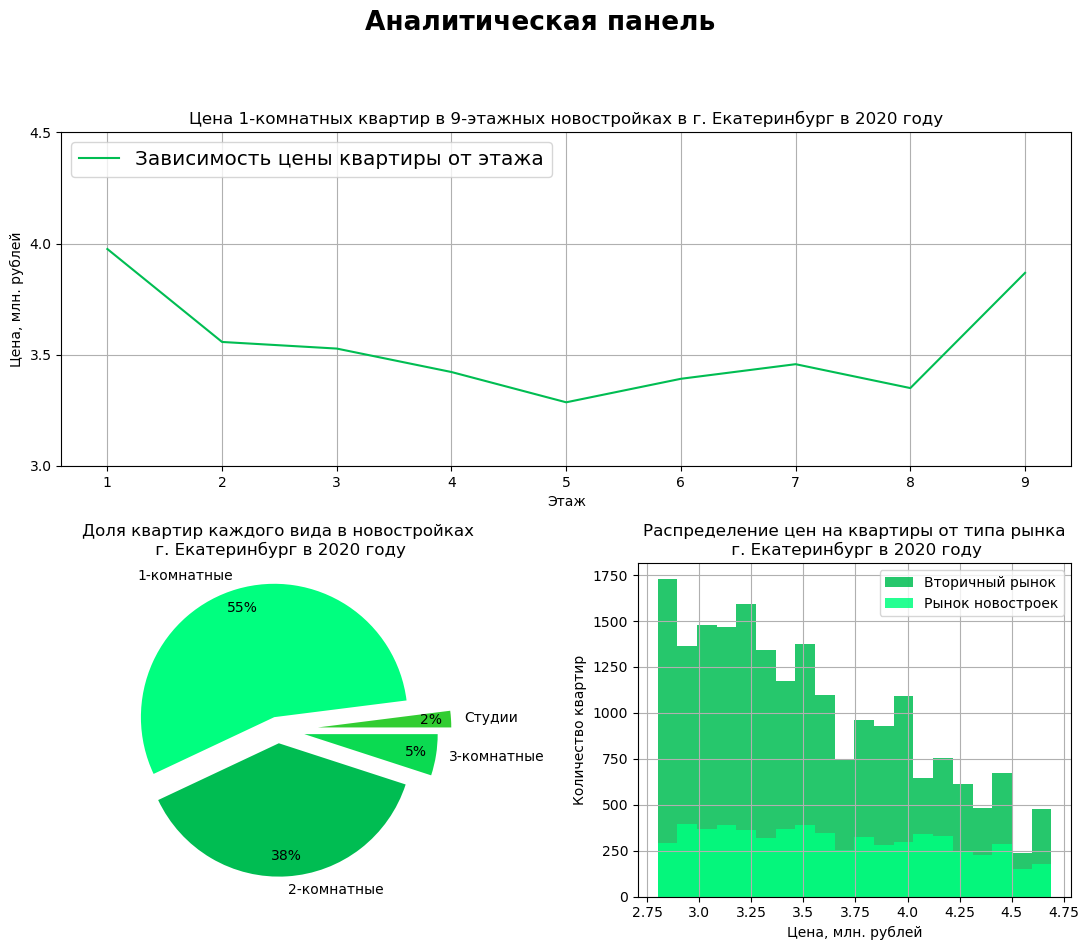

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# размер сетки
plt.figure(figsize=[11, 9])

plt.suptitle('Аналитическая панель ',
              y=1.05,
              fontsize=19,
              fontweight='bold')

# график 1
plt.subplot(2, 1, 1)

apartments_2020_1 = df[(df['date'] > '2019-12-31') &
                  (df['date'] < '2021-01-01') &
                  (df['rooms'] == 1) &
                  (df['object_type'] == 2) &
                  (df['levels'] == 9)]

mean_by_level_and_levels_2020_1 = apartments_2020_1.groupby(['level'])['price'].mean()
df_mean = mean_by_level_and_levels_2020_1.to_frame().reset_index()
df_mean.sort_values(by=['level'], inplace=True)
df_mean['x'] = df_mean.apply(lambda row: str(round(row['level'])), axis=1)

plt.plot(df_mean['x'], df_mean['price'], label='Зависимость цены квартиры от этажа', color='#00bd52')
plt.legend(loc='upper left', fontsize='x-large')
plt.grid(True)

plt.xlabel('Этаж')
plt.ylabel('Цена, млн. рублей')
plt.title('Цена 1-комнатных квартир в 9-этажных новостройках в г. Екатеринбург в 2020 году')
plt.yticks(np.arange(3000000, 5000000, 500000))

plt.gca().yaxis.set_major_formatter(
mpl.ticker.FuncFormatter(lambda x, p: round(x/10**6, 2)))

# график 2
plt.subplot(2, 2, 3)

apartments_2020_2 = df[(df['date'] > '2019-12-31') &
                  (df['date'] < '2021-01-01') &
                  (df['object_type'] == 2)]

count_by_rooms_2020_2 = apartments_2020_2.groupby(['rooms']).count()
count_by_rooms_2020_2.sort_values(by=['rooms'], inplace=True)
sum_all = count_by_rooms_2020_2['price'].sum()
agg_df = count_by_rooms_2020_2.apply(lambda row: round(row['price'] / sum_all, 2), axis=1)

ratios = agg_df
labels = ['Студии', '1-комнатные', '2-комнатные', '3-комнатные']
explode = [0.3, 0.1, 0.1, 0.2]
plt.pie(ratios, autopct='%1.f%%', pctdistance=0.85,
        labels=labels, explode=explode, colors=['#32cd32', '#00ff7f', '#00bd52', '#0bda51'])

plt.title('Доля квартир каждого вида в новостройках\n г. Екатеринбург в 2020 году')

# график 3
plt.subplot(2, 2, 4)

old_apartments = df[(df['date'] > '2019-12-31') &
                    (df['date'] < '2021-01-01') &
                    (df['object_type'] == 1)]
n, bins, patches = plt.hist(old_apartments['price'], 20, facecolor='#00bd52', alpha=0.85, label='Вторичный рынок')

new_apartments = df[(df['date'] > '2019-12-31') &
                    (df['date'] < '2021-01-01') &
                    (df['object_type'] == 2)]
n, bins, patches = plt.hist(new_apartments['price'], 20, facecolor='#00ff7f', alpha=0.85, label='Рынок новостроек')
plt.title('Распределение цен на квартиры от типа рынка\n г. Екатеринбург в 2020 году')
plt.xlabel('Цена, млн. рублей')
plt.ylabel('Количество квартир')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(
mpl.ticker.FuncFormatter(lambda x, p: round(x/10**6, 2)))

plt.tight_layout()
plt.show()

6. Заключение.

1. В ходе работы была выполнена визуализация 3-х графиков следующих видов: обычный график, круговая диаграмма, гистрограмма распределения. Была использована единая цветовая палитра зеленых оттенков, выполнено шкалирование для первого графика, осуществлена предобработка данных перед визуализацией.
2. Набор данных был обогащен за счет добавления сезона публикации о продаже квартиры, добавления ближайшей станции метро и расстояния до нее и добавления информации о ближайшем крупном торговом центре и расстоянии до него. Полученный набор данных может быть использован для анализа признаков и построения прогностических моделей.
3. В ходе работы были получены навыки по фильтрации, очистке от выбросов,редактированию, агрегации и визуализации набора данных.